In [1]:
___
# COVID
__

''

In [3]:
# import the essential libraries

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import  stats

import plotly.express as px


plt.style.use('dark_background')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# reading the datframe
df = pd.read_csv('aggregate_covid_country.csv',date_parser=True)

In [5]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [7]:
df.shape

(23688, 5)

In [8]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [9]:
# check for the missing values

In [10]:
df.isna().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

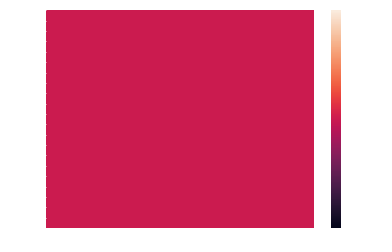

In [11]:
sns.heatmap(df.isna())

In [12]:
# no missing values

In [13]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [14]:
df[df.Country=='New Zealand']

,Date,Country,Confirmed,Recovered,Deaths
123,2020-01-22,New Zealand,0,0,0
311,2020-01-23,New Zealand,0,0,0
499,2020-01-24,New Zealand,0,0,0
687,2020-01-25,New Zealand,0,0,0
875,2020-01-26,New Zealand,0,0,0
...,...,...,...,...,...
22871,2020-05-22,New Zealand,1504,1455,21
23059,2020-05-23,New Zealand,1504,1456,21
23247,2020-05-24,New Zealand,1504,1456,21
23435,2020-05-25,New Zealand,1504,1461,21


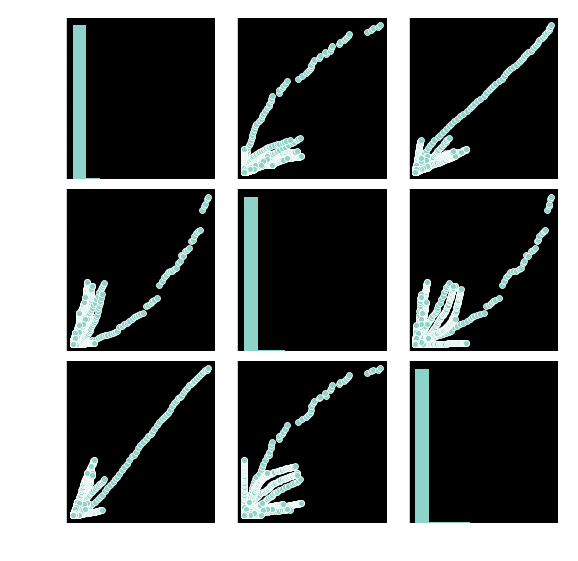

In [15]:
sns.pairplot(df)

In [16]:
# There are 126 records for every country i.e. from january 22 to May 26

In [17]:
# Let's  start on  a country level
df[df.Country=='India']

,Date,Country,Confirmed,Recovered,Deaths
79,2020-01-22,India,0,0,0
267,2020-01-23,India,0,0,0
455,2020-01-24,India,0,0,0
643,2020-01-25,India,0,0,0
831,2020-01-26,India,0,0,0
...,...,...,...,...,...
22827,2020-05-22,India,124794,51824,3726
23015,2020-05-23,India,131423,54385,3868
23203,2020-05-24,India,138536,57692,4024
23391,2020-05-25,India,144950,60706,4172


In [18]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [20]:
# convert date featrue from object dtype to datetime. 
df.Date = df.Date.astype('datetime64[ns]')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23688 non-null  datetime64[ns]
 1   Country    23688 non-null  object        
 2   Confirmed  23688 non-null  int64         
 3   Recovered  23688 non-null  int64         
 4   Deaths     23688 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 925.4+ KB


In [22]:
month_num_to_str_dict= {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May'}

In [23]:
df.Date[0].week

4

In [24]:
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Week'] = df['Date'].apply(lambda x:x.week)
df['Month_str'] = df['Month'].map(month_num_to_str_dict)
df['Day'] = df['Date'].apply(lambda x:x.day)

In [25]:
df[df.Country=='India']

,Date,Country,Confirmed,Recovered,Deaths,Month,Week,Month_str,Day
79,2020-01-22,India,0,0,0,1,4,Jan,22
267,2020-01-23,India,0,0,0,1,4,Jan,23
455,2020-01-24,India,0,0,0,1,4,Jan,24
643,2020-01-25,India,0,0,0,1,4,Jan,25
831,2020-01-26,India,0,0,0,1,4,Jan,26
...,...,...,...,...,...,...,...,...,...
22827,2020-05-22,India,124794,51824,3726,5,21,May,22
23015,2020-05-23,India,131423,54385,3868,5,21,May,23
23203,2020-05-24,India,138536,57692,4024,5,21,May,24
23391,2020-05-25,India,144950,60706,4172,5,22,May,25


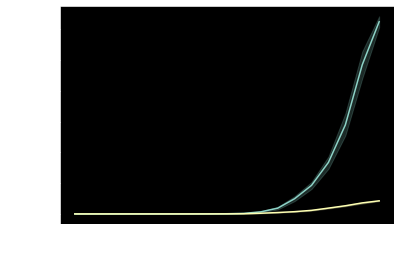

In [26]:
sns.lineplot('Week','Recovered',data=df[df.Country=='India'])
sns.lineplot('Week','Deaths',data=df[df.Country=='India'])

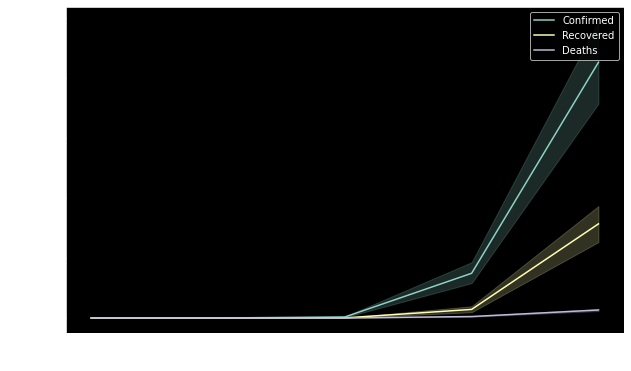

In [27]:
plt.figure(figsize=(10,6))
sns.lineplot('Month','Confirmed',data=df[df.Country=='India'],label='Confirmed')
sns.lineplot('Month','Recovered',data=df[df.Country=='India'],label='Recovered')
sns.lineplot('Month','Deaths',data=df[df.Country=='India'],label='Deaths')
plt.legend()

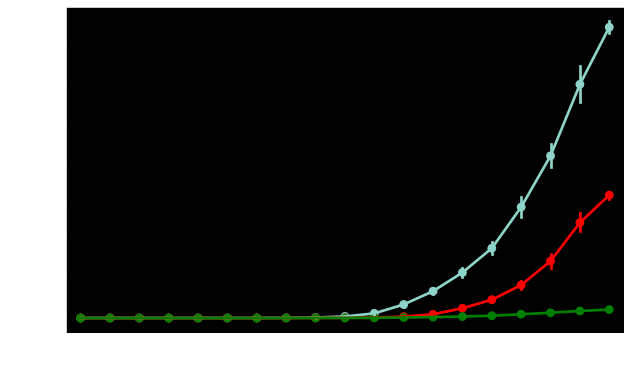

In [28]:
plt.figure(figsize=(10,6))
sns.pointplot('Week','Confirmed',data=df[df.Country=='India'])
sns.pointplot('Week','Recovered',data=df[df.Country=='India'],color='r')
sns.pointplot('Week','Deaths',data=df[df.Country=='India'],color='g')

In [29]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Month,Week,Month_str,Day
0,2020-01-22,Afghanistan,0,0,0,1,4,Jan,22
1,2020-01-22,Albania,0,0,0,1,4,Jan,22
2,2020-01-22,Algeria,0,0,0,1,4,Jan,22
3,2020-01-22,Andorra,0,0,0,1,4,Jan,22
4,2020-01-22,Angola,0,0,0,1,4,Jan,22


In [30]:
df.groupby('Country').agg({'Confirmed':'sum'}).sort_values('Confirmed',ascending=False).head()

,Confirmed
Country,
US,57098767
Italy,11896347
Spain,11890691
United Kingdom,9150537
Germany,9046257


In [31]:
# US was the worst hit country uptill May 26.

In [32]:
px.scatter(df, x="Date",y="Confirmed", color="Country",size='Deaths', hover_name="Country")

In [33]:
# from later end march,the confirmed cases of corona in United States inreased Way more faster than any other country!

In [34]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Month,Week,Month_str,Day
0,2020-01-22,Afghanistan,0,0,0,1,4,Jan,22
1,2020-01-22,Albania,0,0,0,1,4,Jan,22
2,2020-01-22,Algeria,0,0,0,1,4,Jan,22
3,2020-01-22,Andorra,0,0,0,1,4,Jan,22
4,2020-01-22,Angola,0,0,0,1,4,Jan,22


In [35]:
# Let's do some comparison INDIA vs US

In [36]:
df_india = df[df.Country=='India']
df_us = df[df.Country=='US']

In [37]:
df_ind_vs_us = pd.merge(df_india,df_us[['Confirmed','Recovered','Deaths','Date']],on='Date',how='right',suffixes=('_India','_US'))

In [38]:
df_ind_vs_us.head(3)

,Date,Country,Confirmed_India,Recovered_India,Deaths_India,Month,Week,Month_str,Day,Confirmed_US,Recovered_US,Deaths_US
0,2020-01-22,India,0,0,0,1,4,Jan,22,1,0,0
1,2020-01-23,India,0,0,0,1,4,Jan,23,1,0,0
2,2020-01-24,India,0,0,0,1,4,Jan,24,2,0,0


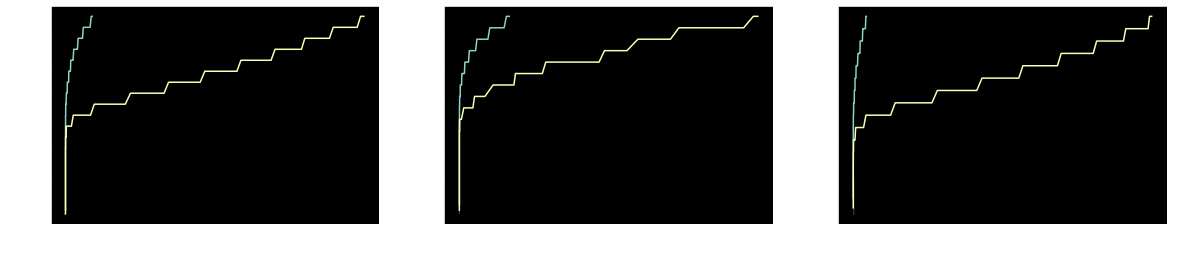

In [39]:
fig = plt.figure(figsize=(20,4))

fig.add_subplot(131)

sns.lineplot('Confirmed_India','Week',data=df_ind_vs_us)
sns.lineplot('Confirmed_US','Week',data=df_ind_vs_us)

fig.add_subplot(132)
sns.lineplot('Recovered_India','Week',data=df_ind_vs_us)
sns.lineplot('Recovered_US','Week',data=df_ind_vs_us)

fig.add_subplot(133)
sns.lineplot('Deaths_India','Week',data=df_ind_vs_us)
sns.lineplot('Deaths_US','Week',data=df_ind_vs_us)

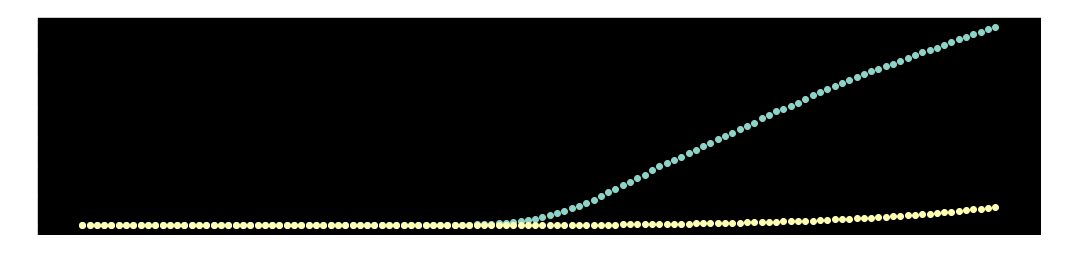

In [40]:
plt.figure(figsize=(18,4))
plt.plot_date('Date','Confirmed_US',data=df_ind_vs_us)
plt.plot_date('Date','Confirmed_India',data=df_ind_vs_us)

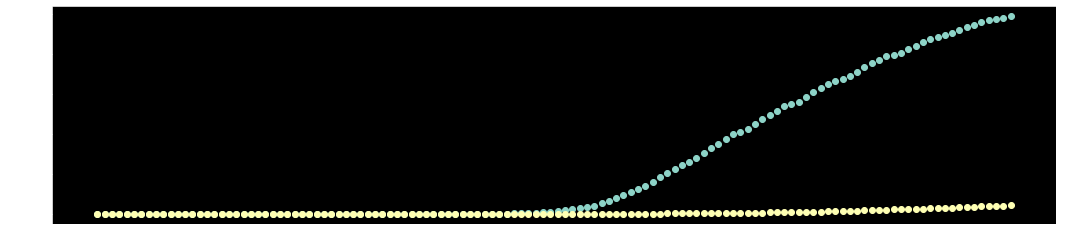

In [41]:
plt.figure(figsize=(18,4))
plt.plot_date('Date','Deaths_US',data=df_ind_vs_us)
plt.plot_date('Date','Deaths_India',data=df_ind_vs_us)

In [42]:
def recovery_rate(x):

  try:
    return x['Recovered'] / x['Confirmed'] * 100
  except ZeroDivisionError:
    return 0

def death_rate(x):

  try:
    return x['Deaths'] / x['Confirmed'] *100
  except ZeroDivisionError:
    return 0

In [43]:
df['recov_rate'] = df.apply(recovery_rate,axis=1)
df['death_rate'] = df.apply(death_rate,axis=1)

In [44]:
df[df.Country=='US']

,Date,Country,Confirmed,Recovered,Deaths,Month,Week,Month_str,Day,recov_rate,death_rate
174,2020-01-22,US,1,0,0,1,4,Jan,22,0.000000,0.000000
362,2020-01-23,US,1,0,0,1,4,Jan,23,0.000000,0.000000
550,2020-01-24,US,2,0,0,1,4,Jan,24,0.000000,0.000000
738,2020-01-25,US,2,0,0,1,4,Jan,25,0.000000,0.000000
926,2020-01-26,US,5,0,0,1,4,Jan,26,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
22922,2020-05-22,US,1600937,350135,95979,5,21,May,22,21.870630,5.995177
23110,2020-05-23,US,1622612,361239,97087,5,21,May,23,22.262808,5.983377
23298,2020-05-24,US,1643246,366736,97720,5,21,May,24,22.317778,5.946766
23486,2020-05-25,US,1662302,379157,98220,5,22,May,25,22.809153,5.908674


In [45]:
# top 15 countries in comparison in the month of may.

df_15_till_may = df.groupby('Country').agg({'Confirmed':'last','Deaths':'last','Recovered':'last','recov_rate':'last','death_rate':'last'}).sort_values('Deaths',ascending=False).reset_index()[:15]

In [46]:
df_15_till_may

,Country,Confirmed,Deaths,Recovered,recov_rate,death_rate
0,US,1680913,98913,384902,22.898389,5.884481
1,United Kingdom,266599,37130,1161,0.435486,13.927284
2,Italy,230555,32955,144658,62.743380,14.293769
3,France,182847,28533,65997,36.094111,15.604850
4,Spain,236259,27117,150376,63.648792,11.477658
5,Brazil,391222,24512,158593,40.537853,6.265496
6,Belgium,57455,9334,15320,26.664346,16.245758
7,Germany,181200,8372,161967,89.385762,4.620309
8,Mexico,74560,8134,51708,69.350858,10.909335
9,Iran,139511,7508,109437,78.443277,5.381654


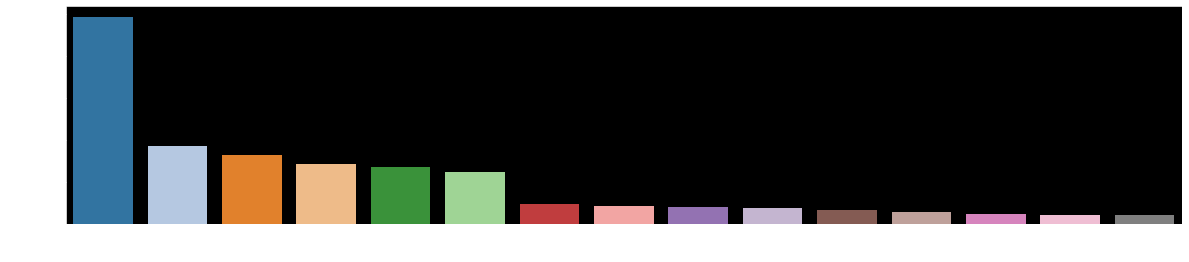

In [47]:
plt.figure(figsize=(20,4))
sns.barplot('Country','Deaths',data=df_15_till_may,palette='tab20')

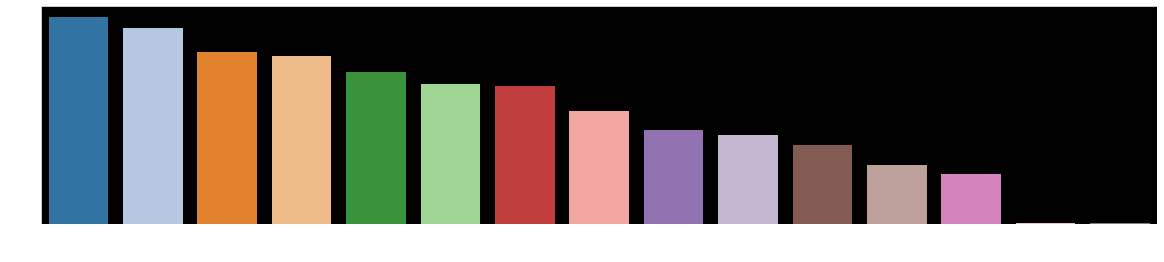

In [48]:
plt.figure(figsize=(20,4))
sns.barplot('Country','recov_rate',data=df_15_till_may.sort_values('recov_rate',ascending=False),palette='tab20')

In [49]:
# Recovery Rate of Top 15 affected Countries

px.bar(df_15_till_may.sort_values('recov_rate',ascending=False),x='Country',y='recov_rate',text='Country')

In [50]:
# Death rate /fatality rate of the top 15 countries.

px.bar(df_15_till_may.sort_values('death_rate',ascending=False),x='Country',y='death_rate',text='Country')

In [51]:
# Belgium and France had the highest death rate....
# We can see that the countries are group  as per the continents..

In [52]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Month,Week,Month_str,Day,recov_rate,death_rate
0,2020-01-22,Afghanistan,0,0,0,1,4,Jan,22,0.0,0.0
1,2020-01-22,Albania,0,0,0,1,4,Jan,22,0.0,0.0
2,2020-01-22,Algeria,0,0,0,1,4,Jan,22,0.0,0.0
3,2020-01-22,Andorra,0,0,0,1,4,Jan,22,0.0,0.0
4,2020-01-22,Angola,0,0,0,1,4,Jan,22,0.0,0.0


In [53]:
# let's comare the China and US and India over a Series of Weeks

df_india = df[df.Country=='India']
df_us = df[df.Country=='US']
df_china = df[df.Country=='China']

In [54]:
df_india

,Date,Country,Confirmed,Recovered,Deaths,Month,Week,Month_str,Day,recov_rate,death_rate
79,2020-01-22,India,0,0,0,1,4,Jan,22,0.000000,0.000000
267,2020-01-23,India,0,0,0,1,4,Jan,23,0.000000,0.000000
455,2020-01-24,India,0,0,0,1,4,Jan,24,0.000000,0.000000
643,2020-01-25,India,0,0,0,1,4,Jan,25,0.000000,0.000000
831,2020-01-26,India,0,0,0,1,4,Jan,26,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
22827,2020-05-22,India,124794,51824,3726,5,21,May,22,41.527638,2.985720
23015,2020-05-23,India,131423,54385,3868,5,21,May,23,41.381646,2.943168
23203,2020-05-24,India,138536,57692,4024,5,21,May,24,41.644049,2.904660
23391,2020-05-25,India,144950,60706,4172,5,22,May,25,41.880648,2.878234


In [55]:
df_us

,Date,Country,Confirmed,Recovered,Deaths,Month,Week,Month_str,Day,recov_rate,death_rate
174,2020-01-22,US,1,0,0,1,4,Jan,22,0.000000,0.000000
362,2020-01-23,US,1,0,0,1,4,Jan,23,0.000000,0.000000
550,2020-01-24,US,2,0,0,1,4,Jan,24,0.000000,0.000000
738,2020-01-25,US,2,0,0,1,4,Jan,25,0.000000,0.000000
926,2020-01-26,US,5,0,0,1,4,Jan,26,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
22922,2020-05-22,US,1600937,350135,95979,5,21,May,22,21.870630,5.995177
23110,2020-05-23,US,1622612,361239,97087,5,21,May,23,22.262808,5.983377
23298,2020-05-24,US,1643246,366736,97720,5,21,May,24,22.317778,5.946766
23486,2020-05-25,US,1662302,379157,98220,5,22,May,25,22.809153,5.908674


In [56]:
df_china

,Date,Country,Confirmed,Recovered,Deaths,Month,Week,Month_str,Day,recov_rate,death_rate
36,2020-01-22,China,548,28,17,1,4,Jan,22,5.109489,3.102190
224,2020-01-23,China,643,30,18,1,4,Jan,23,4.665630,2.799378
412,2020-01-24,China,920,36,26,1,4,Jan,24,3.913043,2.826087
600,2020-01-25,China,1406,39,42,1,4,Jan,25,2.773826,2.987198
788,2020-01-26,China,2075,49,56,1,4,Jan,26,2.361446,2.698795
...,...,...,...,...,...,...,...,...,...,...,...
22784,2020-05-22,China,84081,79332,4638,5,21,May,22,94.351875,5.516109
22972,2020-05-23,China,84084,79335,4638,5,21,May,23,94.352076,5.515913
23160,2020-05-24,China,84095,79343,4638,5,21,May,24,94.349248,5.515191
23348,2020-05-25,China,84102,79352,4638,5,22,May,25,94.352096,5.514732


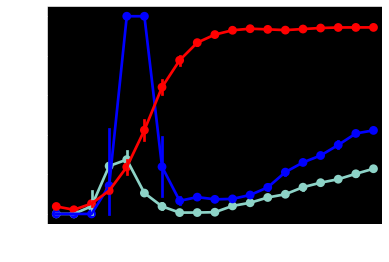

In [57]:
# weekly reovery rate from jan to may 2020

sns.pointplot('Week','recov_rate',data=df_us)
sns.pointplot('Week','recov_rate',data=df_india,color='b')
sns.pointplot('Week','recov_rate',data=df_china,color='r')

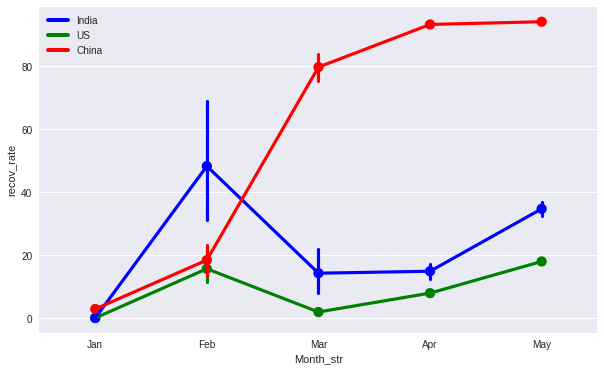

In [58]:
# recovery rate with repect to first 5 months on the year 2020  
plt.style.use('seaborn')

plt.figure(figsize=(10,6))
sns.pointplot('Month_str','recov_rate',data=df_us,color='g')
sns.pointplot('Month_str','recov_rate',data=df_india,color='b')
sns.pointplot('Month_str','recov_rate',data=df_china,color='r')

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='b', lw=4, label='India'),
                   Line2D([0], [0], color='g', lw=4, label='US'),
                   Line2D([0], [0], color='r', lw=4, label='China')]
plt.legend(handles=legend_elements)

In [59]:
# There's a tremendous hike in the recovery rate on China!

In [60]:
# some more evaluation on china

In [61]:
df_china.head()

,Date,Country,Confirmed,Recovered,Deaths,Month,Week,Month_str,Day,recov_rate,death_rate
36,2020-01-22,China,548,28,17,1,4,Jan,22,5.109489,3.102190
224,2020-01-23,China,643,30,18,1,4,Jan,23,4.665630,2.799378
412,2020-01-24,China,920,36,26,1,4,Jan,24,3.913043,2.826087
600,2020-01-25,China,1406,39,42,1,4,Jan,25,2.773826,2.987198
788,2020-01-26,China,2075,49,56,1,4,Jan,26,2.361446,2.698795


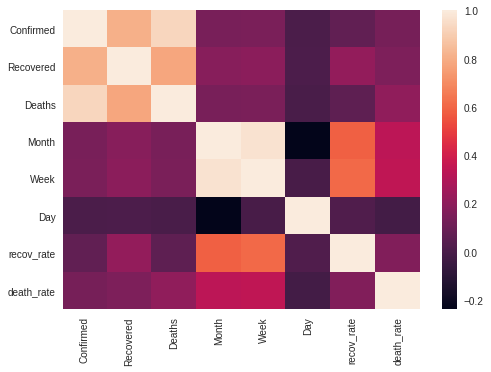

In [62]:
sns.heatmap(df.corr())

In [63]:
# Let' create a model to predict the confirmed cases after some week of some momth

In [64]:
df_cleaned = df.copy()

In [65]:
df_cleaned.sample(5)

,Date,Country,Confirmed,Recovered,Deaths,Month,Week,Month_str,Day,recov_rate,death_rate
3828,2020-02-11,Greece,0,0,0,2,7,Feb,11,0.000000,0.000000
7624,2020-03-02,MS Zaandam,0,0,0,3,10,Mar,2,0.000000,0.000000
21729,2020-05-16,Mali,835,479,48,5,20,May,16,57.365269,5.748503
6557,2020-02-25,Taiwan*,31,5,1,2,9,Feb,25,16.129032,3.225806
13950,2020-04-05,Comoros,0,0,0,4,14,Apr,5,0.000000,0.000000


In [66]:
# let's drop the colums data and month string and create a the remaining explosion of the date feature i.e. `Day` 
df_cleaned = df_cleaned.drop(['Date','Month_str'],1)

In [67]:
df_cleaned

,Country,Confirmed,Recovered,Deaths,Month,Week,Day,recov_rate,death_rate
0,Afghanistan,0,0,0,1,4,22,0.000000,0.000000
1,Albania,0,0,0,1,4,22,0.000000,0.000000
2,Algeria,0,0,0,1,4,22,0.000000,0.000000
3,Andorra,0,0,0,1,4,22,0.000000,0.000000
4,Angola,0,0,0,1,4,22,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
23683,West Bank and Gaza,429,365,3,5,22,26,85.081585,0.699301
23684,Western Sahara,9,6,1,5,22,26,66.666667,11.111111
23685,Yemen,249,10,49,5,22,26,4.016064,19.678715
23686,Zambia,920,336,7,5,22,26,36.521739,0.760870


In [68]:
len(df.Country.unique())

188

In [69]:
# there are 188 country in the datst 
# Let's label encode the country 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [70]:
df_cleaned['Country'] = encoder.fit_transform(df_cleaned['Country'])

In [71]:
df_cleaned

,Country,Confirmed,Recovered,Deaths,Month,Week,Day,recov_rate,death_rate
0,0,0,0,0,1,4,22,0.000000,0.000000
1,1,0,0,0,1,4,22,0.000000,0.000000
2,2,0,0,0,1,4,22,0.000000,0.000000
3,3,0,0,0,1,4,22,0.000000,0.000000
4,4,0,0,0,1,4,22,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
23683,183,429,365,3,5,22,26,85.081585,0.699301
23684,184,9,6,1,5,22,26,66.666667,11.111111
23685,185,249,10,49,5,22,26,4.016064,19.678715
23686,186,920,336,7,5,22,26,36.521739,0.760870


In [72]:
# X and Y split
X = df_cleaned.drop('Confirmed',1)
y = df_cleaned['Confirmed']

y = np.expand_dims(y,1)

In [73]:
X.shape,y.shape

((23688, 8), (23688, 1))

In [74]:
# Let's scale the features to be in between 0 -1.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

In [75]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [76]:
# let's run a linear regression
from sklearn.linear_model import LinearRegression

# scoring metrics
from sklearn.metrics import mean_squared_error,r2_score

In [77]:
def train_n_get_r2(model):

  model.fit(X_train,y_train.ravel())

  return r2_score(y_test,model.predict(X_test))

In [78]:
def train_n_get_mse(model):

  model.fit(X_train,y_train.ravel())

  return mean_squared_error(y_test,model.predict(X_test))

In [79]:
train_n_get_r2(LinearRegression())

0.9015544556559604

In [80]:
train_n_get_mse(LinearRegression())

0.11557007144697809

In [81]:
# the linear model is giving us pretty solid results ,lets try SVR
from sklearn.svm import SVR

In [82]:
train_n_get_r2(SVR())

0.5588107907179858

In [89]:
# SVR is giving us pretty wore results

In [94]:
# lets try ridge lasso and elastic
from sklearn.linear_model import Ridge,Lasso,ElasticNet

train_n_get_r2(Ridge(alpha=0.001))

0.9015544528884186

In [99]:
train_n_get_r2(Lasso(0.001))

0.9015783875939734

In [101]:
train_n_get_r2(ElasticNet(alpha=0.01))

0.9010362423836691

In [116]:
# try ensemble

from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor

In [103]:
train_n_get_r2(RandomForestRegressor())

0.997256361079207

In [104]:
# thats an interseting result...most probably the RF algo is overfitting the data

In [105]:
from sklearn.model_selection import cross_val_score

In [109]:
np.mean(cross_val_score(RandomForestRegressor(),X,y.ravel()))

0.8725275998519788

In [117]:
# this score is preety good for a cross val score

In [119]:
train_n_get_r2(GradientBoostingRegressor())

0.9980728153399041

In [115]:
# let's do one last ...Adaboost
train_n_get_r2(AdaBoostRegressor(base_estimator=RandomForestRegressor()))

0.9996926701901655

In [ ]:
# this is even better r2 than Radom Forest

In [122]:
# create a dataframe and compare the results:

models = [LinearRegression(),SVR(),Ridge(),Lasso(),ElasticNet(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]
model_names = 'LinearRegression SVR Ridge Lasso ElasticNet RandomForestRegressor GradientBoostingRegressor AdaBoostRegressor'.split()
r2 = []
mse = []
avg_cv = []

for model in models:

  model.fit(X_train,y_train.ravel())
  y_preds = model.predict(X_test)
  
  r2.append(r2_score(y_test,y_preds))
  mse.append(mean_squared_error(y_test,y_preds))
  avg_cv.append(np.mean(cross_val_score(model,X,y.ravel())))

pd.DataFrame(list(zip(model_names,mse,r2,avg_cv)),columns=['model','mse','R2_Score','Avg_CV'])

,model,mse,R2_Score,Avg_CV
0,LinearRegression,0.115570,0.901554,0.423894
1,SVR,0.517934,0.558811,-11.431129
2,Ridge,0.115573,0.901552,0.423966
3,Lasso,1.174037,-0.000075,-2.638938
4,ElasticNet,0.658633,0.438960,-0.681176
5,RandomForestRegressor,0.004410,0.996243,0.875160
6,GradientBoostingRegressor,0.002281,0.998057,0.908847
7,AdaBoostRegressor,0.181774,0.845160,-33.245666


In [123]:
# Ensemble techniques always give better scores but they are very much prone to overfitting

In [124]:
# Let's finalize Gradient Boosting as our best model

In [127]:
best_model = GradientBoostingRegressor()

train_n_get_r2(best_model)

0.9981218920511502

In [128]:
train_n_get_mse(best_model)

0.002098679685517155

In [129]:
# comparison of predictions 

In [132]:
best_y_preds = best_model.predict(X_test)

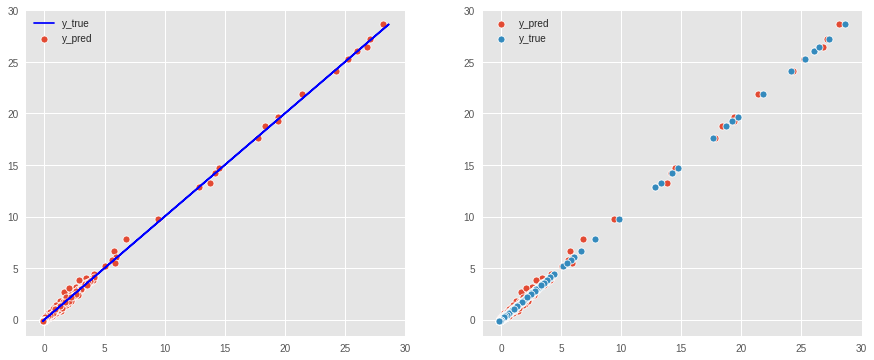

In [162]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,6))

fig.add_subplot(121)
plt.plot(y_test,y_test,color='b',label='y_true')
sns.scatterplot(best_y_preds,y_test.ravel(),label='y_pred')

fig.add_subplot(122)
sns.scatterplot(best_y_preds,y_test.ravel(),palette='Greys',label='y_pred')
sns.scatterplot(y_test.ravel(),y_test.ravel(),palette='Greens',label='y_true')

In [153]:
# Our predictions come real close to the true values

In [163]:
# saving the model
import joblib

In [164]:
joblib.dump(best_model,'covid_model_v1.pkl')

['covid_model_v1.pkl']